In [2]:
print('hello world')

hello world


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
file_location="/Users/rongyi/Downloads/"
file_name = "Python_project_eda.csv"
my_data=pd.read_csv(file_location+file_name)

In [3]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [4]:
my_data.shape

(566699, 15)

In [5]:
#summary data
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [6]:
def mean(x):
    return float(sum(x))/len(x)
np.mean(my_data.spend_usd_next_14_days)

67.80883817484795

In [7]:
def stddev(x):
    m=mean(x)
    return math.pow(sum((i-m)**2 for i in x)/len(x),0.5) # list comprehension

In [8]:
np.std(my_data.spend_usd_next_14_days)

214.09668268368236

In [9]:
def median(x):
    s= sorted(x)
    n = len(x)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (s[lower_mid],s[super_mid])
a= np.nanmedian(my_data.spend_usd_next_14_days)
print a 

15.828656


In [10]:
def quantile_range(q,x):
    s = sorted(x)
    n = len(x)
    upper_d = int(math.ceil(q*(n+1)))
    lower_d = int(math.floor(q*(n+1)))
    if upper_d == 0:upper_d =1
    if upper_d == n+1: upper_d = n
    if lower_d == 0: lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1],S[upper_d-1])                  

In [11]:
spend_usd_next_14_days = my_data.spend_usd_next_14_days
spend_usd_next_14_days = spend_usd_next_14_days.dropna()
spend_usd_next_14_days.describe()

count    89032.000000
mean        67.808838
std        214.097885
min          0.002991
25%          4.990000
50%         15.828656
75%         54.795602
max      22519.570000
Name: spend_usd_next_14_days, dtype: float64

In [12]:
# skewness
stats.skew(spend_usd_next_14_days)

25.481428896161574

In [13]:
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

my_series = pd.Series(spend_usd_next_14_days)

result = winsorize_series(my_series)
result.describe()

count    89032.000000
mean        49.806191
std         76.009381
min          1.026880
25%          4.990000
50%         15.828656
75%         54.795602
max        289.344500
Name: spend_usd_next_14_days, dtype: float64

In [14]:
file_location="/Users/rongyi/Downloads/"
file_name = "Python_project_experiment.csv"
my_data2=pd.read_csv(file_location+file_name)

In [15]:
my_data2.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,,0.0,3,16554430871838092438,NaN
1,NaN,NaN,12624548,,0.0,14,14411542309984779713,NaN
2,NaN,NaN,12624549,,0.0,20,8425202140671508556,NaN
3,NaN,NaN,12624549,,0.0,16,11302731652742770675,NaN
4,NaN,NaN,12624549,,0.0,14,1399243101040681867,NaN


In [17]:
my_series.count()

89032

In [18]:
sum(my_series)/my_series.count()

49.806191066820524

In [19]:
my_series.head()

3       7.398815
14     33.820000
17      1.980000
18    289.344500
24      7.619224
Name: spend_usd_next_14_days, dtype: float64

In [20]:
spend_usd_next_14_days.head()

3       7.398815
14     33.820000
17      1.980000
18    289.344500
24      7.619224
Name: spend_usd_next_14_days, dtype: float64

In [22]:
new = my_data[['spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_fop','user_added_gift_card','user_added_paypal','clicked_buy_before','made_purchase_before']]

In [23]:
new = new[new.clicked_buy_before>0]

In [24]:
new = new[new.made_purchase_before<1]

In [25]:
new

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,clicked_buy_before,made_purchase_before
15,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0
54,1.083211,0.0,1.0,1,0.0,0.0,1.0,0.0
61,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0
83,NaN,0.0,1.0,1,1.0,0.0,1.0,0.0
98,NaN,1.0,0.0,1,0.0,0.0,1.0,0.0
143,NaN,0.0,0.0,1,0.0,1.0,1.0,0.0
157,NaN,NaN,NaN,0,NaN,NaN,1.0,0.0
166,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0
201,NaN,1.0,0.0,1,0.0,0.0,1.0,0.0
241,NaN,0.0,1.0,1,0.0,0.0,1.0,0.0


In [29]:
new_cc=new[(new.user_added_credit_card==1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]
new_gc=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card==1)&(new.user_added_paypal<1)]
new_dcb=new[(new.user_added_credit_card<1)&(new.user_added_dcb==1)&(new.user_added_gift_card<1)&(new.user_added_paypal<1)]
new_pp=new[(new.user_added_credit_card<1)&(new.user_added_dcb<1)&(new.user_added_gift_card<1)&(new.user_added_paypal==1)]
new_mto = new[new.user_added_credit_card+new.user_added_dcb+new.user_added_gift_card+new.user_added_paypal>1]

In [30]:
cr_mto = float(sum(new_mto.spend_usd_next_14_days>0))/float(new_mto['made_purchase_before'].count())
cr_cc = float(sum(new_cc.spend_usd_next_14_days>0))/float(new_cc['made_purchase_before'].count())
cr_gc = float(sum(new_gc.spend_usd_next_14_days>0))/float(new_gc['made_purchase_before'].count())
cr_dcb = float(sum(new_dcb.spend_usd_next_14_days>0))/float(new_dcb['made_purchase_before'].count())
cr_pp = float(sum(new_pp.spend_usd_next_14_days>0))/float(new_pp['made_purchase_before'].count())

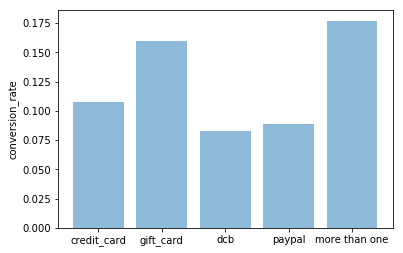

In [33]:
payment_method = ['credit_card','gift_card','dcb','paypal','more than one']
y_pos = np.arange(len(payment_method))
conversion_rate = [cr_cc,cr_gc,cr_dcb,cr_pp,cr_mto]
plt.bar(y_pos,conversion_rate,align = 'center',alpha = 0.5)
plt.xticks(y_pos,payment_method)
plt.ylabel('conversion_rate')

In [34]:
new_mto

,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,clicked_buy_before,made_purchase_before
83,NaN,0.0,1.0,1,1.0,0.0,1.0,0.0
307,NaN,1.0,0.0,1,0.0,1.0,1.0,0.0
623,NaN,1.0,0.0,1,1.0,0.0,1.0,0.0
974,NaN,1.0,0.0,1,0.0,1.0,1.0,0.0
1167,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
1409,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
1677,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
1783,1.069715,1.0,1.0,1,1.0,0.0,1.0,0.0
1870,NaN,1.0,1.0,1,0.0,0.0,1.0,0.0
2000,NaN,0.0,1.0,1,1.0,1.0,1.0,0.0


In [35]:
cr_mto

0.17697729052466718

In [36]:
mto_cc = new_mto[new_mto.user_added_credit_card==1]

In [37]:
mto_cc.shape

(2209, 8)

In [38]:
sum(mto_cc.spend_usd_next_14_days>0)

380

In [39]:
mto_cc_cr = float(sum(mto_cc.spend_usd_next_14_days>0))/float(mto_cc['clicked_buy_before'].count())

In [40]:
mto_gf = new_mto[new_mto.user_added_gift_card==1]
mto_gf_cr = float(sum(mto_gf.spend_usd_next_14_days>0))/float(mto_gf['clicked_buy_before'].count())

In [41]:
mto_dcb = new_mto[new_mto.user_added_dcb==1]
mto_dcb_cr = float(sum(mto_dcb.spend_usd_next_14_days>0))/float(mto_dcb['clicked_buy_before'].count())

In [42]:
mto_pp = new_mto[new_mto.user_added_paypal==1]
mto_pp_cr = float(sum(mto_pp.spend_usd_next_14_days>0))/float(mto_pp['clicked_buy_before'].count())

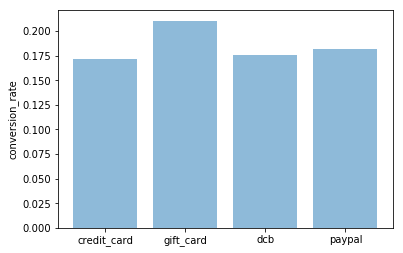

In [43]:
payment_m= ['credit_card','gift_card','dcb','paypal']
y_pos = np.arange(len(payment_m))
conversion_rate = [mto_cc_cr,mto_gf_cr,mto_dcb_cr,mto_pp_cr]
plt.bar(y_pos,conversion_rate,align = 'center',alpha = 0.5)
plt.xticks(y_pos,payment_m)
plt.ylabel('conversion_rate')

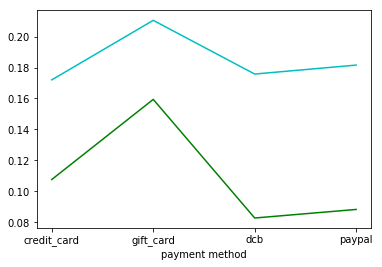

In [45]:
conversion_rate_one = [cr_cc,cr_gc,cr_dcb,cr_pp]


plt.plot(y_pos, conversion_rate, label='More than one payment method', color='c')
plt.plot(y_pos, conversion_rate_one, label='One payment method', color='g')
plt.xticks(y_pos,payment_m)
plt.xlabel('payment method')

In [60]:
my_data2 = my_data2.dropna(axis=0)

In [61]:
my_data2.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
13,JP,2017-04-07,12624549,11163522324375168320,2.164181,14,10866268052521674886,GAMES
16,ID,2017-04-02,12624548,6150947317170565689,0.975841,9,12694082849855316689,GAMES
17,ID,2017-04-02,12624548,14655009389327646207,2.868148,9,12694082849855316689,GAMES
19,JP,2017-04-06,12624548,12543741064946064489,26.174415,4,10988135320952010206,GAMES
20,JP,2017-04-04,12624548,3013104460092423921,1.084750,4,10988135320952010206,GAMES


In [81]:
my_data2.date = pd.to_datetime(my_data2.date)
my_data2.date.head()
my_data2.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
13,JP,2017-04-07,12624549,11163522324375168320,2.164181,14,10866268052521674886,GAMES
16,ID,2017-04-02,12624548,6150947317170565689,0.975841,9,12694082849855316689,GAMES
17,ID,2017-04-02,12624548,14655009389327646207,2.868148,9,12694082849855316689,GAMES
19,JP,2017-04-06,12624548,12543741064946064489,26.174415,4,10988135320952010206,GAMES
20,JP,2017-04-04,12624548,3013104460092423921,1.084750,4,10988135320952010206,GAMES


In [83]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [84]:
experiment = my_data2[my_data2.experiment_id == 12624548]
control = my_data2[my_data2.experiment_id == 12624549]

In [85]:
expbar = experiment.mean()
expvar = experiment.var(ddof=1)
nexp = experiment.size
expdof = float(nexp - 1)
conbar = control.mean()
convar = control.var(ddof=1)
ncon = control.size
condof = float(ncon - 1)

In [86]:
experiment

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
16,ID,2017-04-02,12624548,6150947317170565689,0.975841,9,12694082849855316689,GAMES
17,ID,2017-04-02,12624548,14655009389327646207,2.868148,9,12694082849855316689,GAMES
19,JP,2017-04-06,12624548,12543741064946064489,26.174415,4,10988135320952010206,GAMES
20,JP,2017-04-04,12624548,3013104460092423921,1.084750,4,10988135320952010206,GAMES
76,JP,2017-04-07,12624548,12929936334807191325,1.262439,17,6486389964360733056,GAMES
86,ID,2017-04-01,12624548,7383595032303830590,1.013674,8,1893651073687169673,GAMES
87,ID,2017-04-06,12624548,15652901435712905161,1.013078,8,1893651073687169673,GAMES
88,ID,2017-04-01,12624548,10581492511457947860,1.013674,8,1893651073687169673,GAMES
150,JP,2017-04-04,12624548,1917784530785317893,6.495606,18,13851593864545079567,GAMES
151,JP,2017-04-07,12624548,7546697803446907926,6.492545,18,13851593864545079567,GAMES


In [87]:
t, p = ttest_ind(experiment.spend_usd, control.spend_usd, equal_var=False)

In [88]:
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 1.20403  p = 0.228599


In [89]:
expbar = experiment.spend_usd.mean()
expvar = experiment.spend_usd.var(ddof=1)
nexp = experiment.spend_usd.size
expdof = float(nexp - 1)
conbar = control.spend_usd.mean()
convar = control.spend_usd.var(ddof=1)
ncon = control.spend_usd.size
condof = float(ncon - 1)

In [90]:
t2, p2 = ttest_ind_from_stats(expbar, np.sqrt(expvar), nexp,
                              conbar, np.sqrt(convar), ncon,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

ttest_ind_from_stats: t = 1.20403  p = 0.228599


In [91]:
def GetCumulativeSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))


def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids):
    
    index_series = np.unique(my_data.date) 
    index_series = np.sort(index_series)
    
   
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0])[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1])[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0])[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1])[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)


Cumulative revenue impact: 11.3361028564%


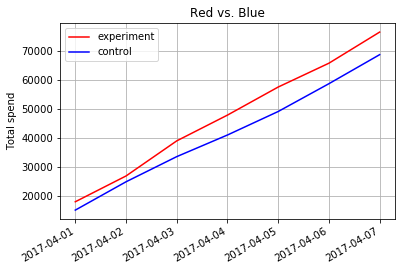

In [82]:
PrintCumulativeTimeSeries(my_data2, [12624548,12624549])